In [11]:
import pandas as pd

# Load the dataset
file_path = "seattle_1960-2024_with_tavg_recalculated.csv"
df = pd.read_csv(file_path)

# Parse the DATE column as datetime
df['DATE'] = pd.to_datetime(df['DATE'])


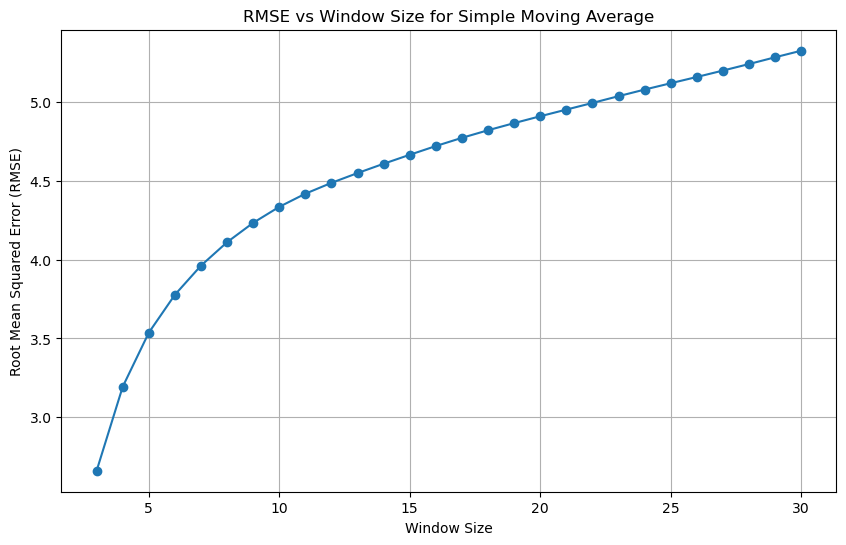

Optimal window size: 3, Minimum RMSE: 2.66


In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
file_path = "seattle_1960-2024_with_tavg_recalculated.csv" 
df = pd.read_csv(file_path)

# Parse DATE column and drop missing values
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df = df[['DATE', 'TAVG']].dropna()

# Function to calculate RMSE for a given window size
def calculate_sma_rmse(df, window_size):
    df['SMA'] = df['TAVG'].rolling(window=window_size).mean()
    df_valid = df.dropna(subset=['SMA'])  # Drop rows with NaN due to rolling
    actual = df_valid['TAVG']
    predicted = df_valid['SMA']
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return rmse

# Vary window size from 3 to 30 and compute RMSE
window_sizes = range(3, 31)  # Window sizes from 3 to 30
rmse_values = []

for window in window_sizes:
    rmse = calculate_sma_rmse(df.copy(), window)
    rmse_values.append(rmse)

# Plot RMSE vs Window Size
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, rmse_values, marker='o', linestyle='-')
plt.xlabel('Window Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Window Size for Simple Moving Average')
plt.grid()
plt.show()

# Print the window size with the minimum RMSE
min_rmse = min(rmse_values)
optimal_window = window_sizes[rmse_values.index(min_rmse)]
print(f"Optimal window size: {optimal_window}, Minimum RMSE: {min_rmse:.2f}")


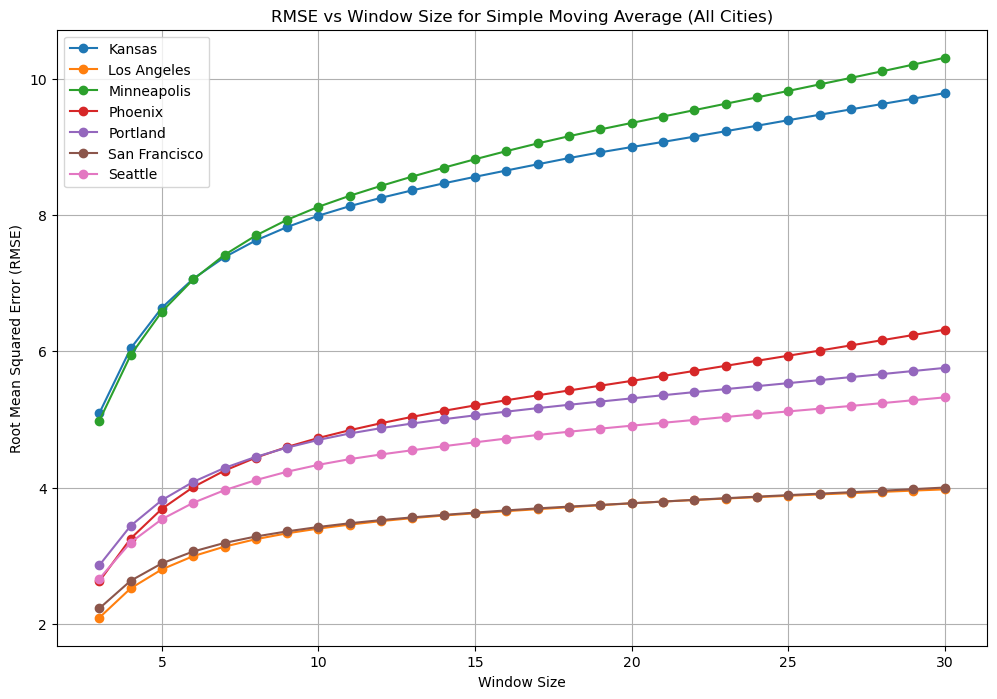

Summary of Optimal Window Size, RMSE, and Temperatures for Each City:
            City      RMSE  Average Temperature  Temp at Min RMSE  \
0         Kansas  5.091664            56.869270         56.871420   
1    Los Angeles  2.089705            63.241639         63.242998   
2    Minneapolis  4.981204            45.872169         45.873879   
3        Phoenix  2.624216            74.160667         74.163529   
4       Portland  2.859099            54.243487         54.245654   
5  San Francisco  2.226464            57.849368         57.850929   
6        Seattle  2.661291            53.564121         53.567604   

   Optimal Window Size  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
5                    3  
6                    3  


In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate RMSE for SMA with varying window sizes
def calculate_sma_rmse_for_city(file_path, city_name, window_sizes):
    df = pd.read_csv(file_path)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
    df = df[['DATE', 'TAVG']].dropna()

    rmse_values = []
    temp_at_min_rmse = None
    min_rmse = float('inf')
    
    # Calculate RMSE for each window size
    for window in window_sizes:
        df['SMA'] = df['TAVG'].rolling(window=window).mean()
        df_valid = df.dropna(subset=['SMA'])
        actual = df_valid['TAVG']
        predicted = df_valid['SMA']
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        rmse_values.append(rmse)

        # Track minimum RMSE and corresponding temperature
        if rmse < min_rmse:
            min_rmse = rmse
            temp_at_min_rmse = df_valid['TAVG'].mean()
    
    # Calculate average temperature for the dataset
    average_temperature = df['TAVG'].mean()

    return city_name, rmse_values, average_temperature, temp_at_min_rmse, min_rmse

# File paths and city names
files_and_cities = [
    ("kansas_1960-2024_with_tavg_recalculated.csv", "Kansas"),
    ("los_angeles_1960-2024_with_tavg_recalculated.csv", "Los Angeles"),
    ("minneapolis_1960-2024_with_tavg_recalculated.csv", "Minneapolis"),
    ("phoenix_1960-2024_with_tavg_recalculated.csv", "Phoenix"),
    ("portland_1960-2024_with_tavg_recalculated.csv", "Portland"),
    ("san_francisco_1960-2024_with_tavg_recalculated.csv", "San Francisco"),
    ("seattle_1960-2024_with_tavg_recalculated.csv", "Seattle")
]

# Window sizes to test
window_sizes = range(3, 31)

# Plot results for all cities
plt.figure(figsize=(12, 8))
rmse_results = []

for file_path, city in files_and_cities:
    city_name, rmse_values, avg_temp, temp_at_min_rmse, min_rmse = calculate_sma_rmse_for_city(
        file_path, city, window_sizes)
    optimal_window_size = window_sizes[rmse_values.index(min_rmse)]
    rmse_results.append({
        'City': city_name,
        'RMSE': min_rmse,
        'Average Temperature': avg_temp,
        'Temp at Min RMSE': temp_at_min_rmse,
        'Optimal Window Size': optimal_window_size
    })
    plt.plot(window_sizes, rmse_values, marker='o', linestyle='-', label=f'{city_name}')

# Plot configurations
plt.xlabel('Window Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Window Size for Simple Moving Average (All Cities)')
plt.grid()
plt.legend()
plt.show()

# Print summary table
rmse_summary = pd.DataFrame(rmse_results)
print("Summary of Optimal Window Size, RMSE, and Temperatures for Each City:")
print(rmse_summary)


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract year and month-day
df['Year'] = df['DATE'].dt.year
df['Day-Month'] = df['DATE'].dt.strftime('%m-%d')

# Initialize the 5-Year Average column
df['5_Year_Avg'] = None

# Calculate the average for the same day over the last 5 years
for index, row in df.iterrows():
    start_date = row['DATE'] - pd.DateOffset(years=5)
    mask = (df['DATE'] > start_date) & (df['DATE'] <= row['DATE']) & (df['Day-Month'] == row['Day-Month'])
    df.at[index, '5_Year_Avg'] = df.loc[mask, 'TAVG'].mean()

# Drop rows with NaN
df = df.dropna(subset=['5_Year_Avg'])

# Compute RMSE
actual = df['TAVG']
predicted = df['5_Year_Avg']
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"RMSE for Five-Year Seasonal Average: {rmse:.2f}")


RMSE for Five-Year Seasonal Average: 4.24


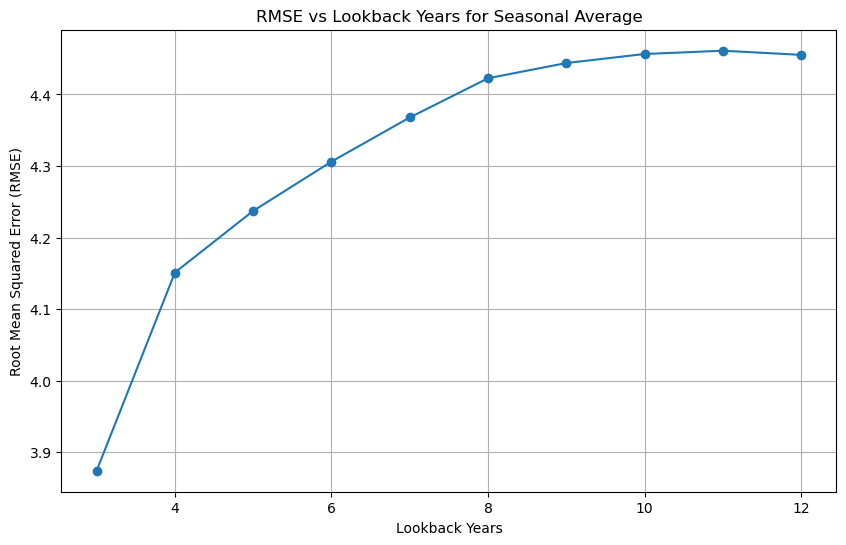

Optimal Lookback Years: 3, Minimum RMSE: 3.87


In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
file_path = "seattle_1960-2024_with_tavg_recalculated.csv"  
df = pd.read_csv(file_path)

# Parse DATE column and drop missing values
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df = df[['DATE', 'TAVG']].dropna()

# Extract year and month-day for seasonal comparison
df['Year'] = df['DATE'].dt.year
df['Day-Month'] = df['DATE'].dt.strftime('%m-%d')

# Function to calculate RMSE for different lookback years
def calculate_rmse_for_years(df, lookback_years):
    df_copy = df.copy()
    df_copy['Year_Avg'] = None  # Initialize column

    for index, row in df_copy.iterrows():
        start_date = row['DATE'] - pd.DateOffset(years=lookback_years)
        mask = (df_copy['DATE'] > start_date) & (df_copy['DATE'] <= row['DATE']) & \
               (df_copy['Day-Month'] == row['Day-Month'])
        df_copy.at[index, 'Year_Avg'] = df_copy.loc[mask, 'TAVG'].mean()

    # Drop rows with NaN values
    df_valid = df_copy.dropna(subset=['Year_Avg'])

    # Compute RMSE
    actual = df_valid['TAVG']
    predicted = df_valid['Year_Avg']
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return rmse

# List of years to test (3 to 12 years)
lookback_years_list = list(range(3, 13))
rmse_values = []

# Calculate RMSE for each lookback year
for years in lookback_years_list:
    rmse = calculate_rmse_for_years(df, years)
    rmse_values.append(rmse)

# Plot RMSE vs Lookback Years
plt.figure(figsize=(10, 6))
plt.plot(lookback_years_list, rmse_values, marker='o', linestyle='-')
plt.xlabel('Lookback Years')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Lookback Years for Seasonal Average')
plt.grid()
plt.show()

# Print optimal lookback year with minimum RMSE
optimal_years = lookback_years_list[rmse_values.index(min(rmse_values))]
print(f"Optimal Lookback Years: {optimal_years}, Minimum RMSE: {min(rmse_values):.2f}")


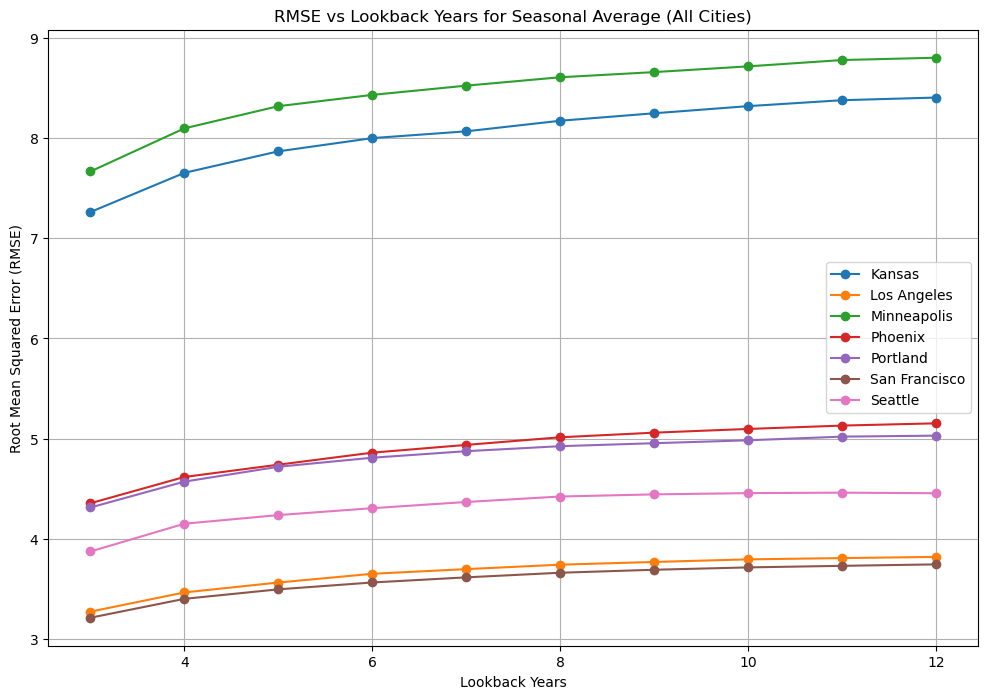

Summary of Optimal Lookback Years and Minimum RMSE for Each City:
            City      RMSE  Average Temperature  Temp at Min RMSE  Min RMSE  \
0         Kansas  7.261506            56.869270         56.869270  7.261506   
1    Los Angeles  3.273781            63.241639         63.241639  3.273781   
2    Minneapolis  7.666036            45.872169         45.872169  7.666036   
3        Phoenix  4.355431            74.160667         74.160667  4.355431   
4       Portland  4.313147            54.243487         54.243487  4.313147   
5  San Francisco  3.213186            57.849368         57.849368  3.213186   
6        Seattle  3.874170            53.564121         53.564121  3.874170   

   Optimal Lookback Years  
0                       3  
1                       3  
2                       3  
3                       3  
4                       3  
5                       3  
6                       3  


In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate RMSE for a specific city and lookback years
def calculate_rmse_for_city(file_path, city_name, lookback_years_list):
    df = pd.read_csv(file_path)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
    df = df[['DATE', 'TAVG']].dropna()

    # Extract year and month-day for seasonal comparison
    df['Year'] = df['DATE'].dt.year
    df['Day-Month'] = df['DATE'].dt.strftime('%m-%d')

    def calculate_rmse(df, lookback_years):
        df_copy = df.copy()
        df_copy['Year_Avg'] = None

        for index, row in df_copy.iterrows():
            start_date = row['DATE'] - pd.DateOffset(years=lookback_years)
            mask = (df_copy['DATE'] > start_date) & (df_copy['DATE'] <= row['DATE']) & \
                   (df_copy['Day-Month'] == row['Day-Month'])
            df_copy.at[index, 'Year_Avg'] = df_copy.loc[mask, 'TAVG'].mean()

        df_valid = df_copy.dropna(subset=['Year_Avg'])
        actual = df_valid['TAVG']
        predicted = df_valid['Year_Avg']
        return np.sqrt(mean_squared_error(actual, predicted)), df_valid

    # Calculate RMSE for each lookback year
    rmse_values = []
    min_rmse = float('inf')
    temp_at_min_rmse = None
    avg_temp = df['TAVG'].mean()

    for years in lookback_years_list:
        rmse, df_valid = calculate_rmse(df, years)
        rmse_values.append(rmse)

        # Find the temperature at minimum RMSE
        if rmse < min_rmse:
            min_rmse = rmse
            temp_at_min_rmse = df_valid['TAVG'].mean()

    # Find optimal lookback years
    optimal_years = lookback_years_list[rmse_values.index(min_rmse)]
    return {
        'City': city_name,
        'RMSE': min_rmse,
        'Average Temperature': avg_temp,
        'Temp at Min RMSE': temp_at_min_rmse,
        'Min RMSE': min_rmse,
        'Optimal Lookback Years': optimal_years
    }, rmse_values

# File paths and city names
files_and_cities = [
    ("kansas_1960-2024_with_tavg_recalculated.csv", "Kansas"),
    ("los_angeles_1960-2024_with_tavg_recalculated.csv", "Los Angeles"),
    ("minneapolis_1960-2024_with_tavg_recalculated.csv", "Minneapolis"),
    ("phoenix_1960-2024_with_tavg_recalculated.csv", "Phoenix"),
    ("portland_1960-2024_with_tavg_recalculated.csv", "Portland"),
    ("san_francisco_1960-2024_with_tavg_recalculated.csv", "San Francisco"),
    ("seattle_1960-2024_with_tavg_recalculated.csv", "Seattle")
]

# Lookback years to test
lookback_years_list = list(range(3, 13))

# Results storage
all_results = []
plt.figure(figsize=(12, 8))

# Process each city and calculate RMSE
for file_path, city in files_and_cities:
    result, rmse_values = calculate_rmse_for_city(file_path, city, lookback_years_list)
    all_results.append(result)
    plt.plot(lookback_years_list, rmse_values, marker='o', linestyle='-', label=city)

# Plot configurations
plt.xlabel('Lookback Years')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Lookback Years for Seasonal Average (All Cities)')
plt.grid()
plt.legend()
plt.show()

# Print summary table
results_df = pd.DataFrame(all_results)
print("Summary of Optimal Lookback Years and Minimum RMSE for Each City:")
print(results_df)


In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the column for year-over-year comparison
df['5_Year_TAVG'] = None

# Compare current day's temperature with the value 5 years earlier
for index, row in df.iterrows():
    comparison_date = row['DATE'] - pd.DateOffset(years=5)
    mask = (df['DATE'] == comparison_date)
    if mask.any():
        df.at[index, '5_Year_TAVG'] = df.loc[mask, 'TAVG'].values[0]

# Drop rows with NaN
df = df.dropna(subset=['5_Year_TAVG'])

# Compute RMSE
actual = df['TAVG']
predicted = df['5_Year_TAVG']
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"RMSE for Year-over-Year Comparison: {rmse:.2f}")


RMSE for Year-over-Year Comparison: 7.15


In [15]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

# Select the required columns and drop rows with NaN
data = df[['TAVG', 'TMAX', 'TMIN']].dropna()

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length, 0])  # TAVG as the target
    return np.array(X), np.array(y)

sequence_length = 5
X, y = create_sequences(data_scaled, sequence_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Last time step
        return out

model = RNN(input_size=3, hidden_size=50, output_size=1, num_layers=2)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
batch_size = 16
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze()

# Inverse transform predictions
y_pred_inverse = scaler.inverse_transform(
    np.hstack((y_pred.numpy().reshape(-1, 1), np.zeros((y_pred.shape[0], 2))))
)[:, 0]
y_test_inverse = scaler.inverse_transform(
    np.hstack((y_test.numpy().reshape(-1, 1), np.zeros((y_test.shape[0], 2))))
)[:, 0]

# Compute RMSE
rmse = math.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
print(f"RMSE for RNN-Based Model: {rmse:.2f}")


Epoch [10/100], Loss: 0.0029
Epoch [20/100], Loss: 0.0022
Epoch [30/100], Loss: 0.0020
Epoch [40/100], Loss: 0.0020
Epoch [50/100], Loss: 0.0020
Epoch [60/100], Loss: 0.0021
Epoch [70/100], Loss: 0.0021
Epoch [80/100], Loss: 0.0023
Epoch [90/100], Loss: 0.0023
Epoch [100/100], Loss: 0.0023
RMSE for RNN-Based Model: 3.54


Epoch [10/100], Loss: 0.0016
Epoch [20/100], Loss: 0.0017
Epoch [30/100], Loss: 0.0017
Epoch [40/100], Loss: 0.0019
Epoch [50/100], Loss: 0.0019
Epoch [60/100], Loss: 0.0019
Epoch [70/100], Loss: 0.0020
Epoch [80/100], Loss: 0.0020
Epoch [90/100], Loss: 0.0021
Epoch [100/100], Loss: 0.0021
Root Mean Squared Error (RMSE): 3.61


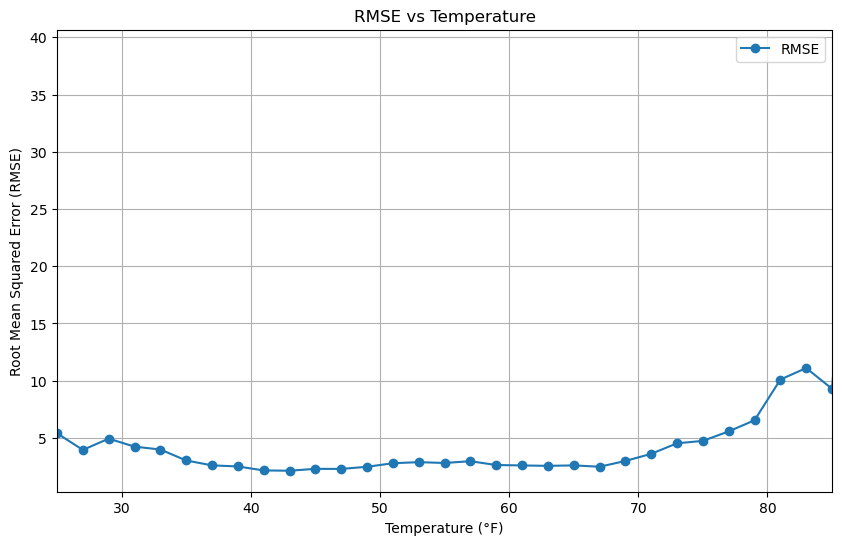

In [27]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# Load dataset
file_path = "seattle_1960-2024_with_tavg_recalculated.csv" 
df = pd.read_csv(file_path)

# Parse DATE column and drop missing values
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df = df[['TAVG', 'TMAX', 'TMIN']].dropna()

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['TAVG', 'TMAX', 'TMIN']])

# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length, 0])  # TAVG as target
    return np.array(X), np.array(y)

# Prepare data
sequence_length = 5
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Output of the last time step
        return out

# Model parameters
input_size = 3  # TAVG, TMAX, TMIN
hidden_size = 50
output_size = 1
num_layers = 2

# Initialize model, loss, and optimizer
model = RNN(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
batch_size = 16
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze()

# Inverse transform the predictions and true values
y_pred_inverse = scaler.inverse_transform(
    np.hstack((y_pred.numpy().reshape(-1, 1), np.zeros((y_pred.shape[0], 2))))
)[:, 0]
y_test_inverse = scaler.inverse_transform(
    np.hstack((y_test.numpy().reshape(-1, 1), np.zeros((y_test.shape[0], 2))))
)[:, 0]

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# ------------------- RMSE vs Temperature Plot -------------------
# Create DataFrame for RMSE and actual temperature
df_rmse = pd.DataFrame({'TAVG': y_test_inverse, 'RMSE': np.sqrt((y_test_inverse - y_pred_inverse) ** 2)})

# Define temperature bins
bins = np.arange(int(df_rmse['TAVG'].min()), int(df_rmse['TAVG'].max()) + 2, 2)  
df_rmse['Temp_Range'] = pd.cut(df_rmse['TAVG'], bins)

# Calculate average RMSE for each temperature range
avg_rmse_by_temp = df_rmse.groupby('Temp_Range')['RMSE'].mean().reset_index()
avg_rmse_by_temp['Avg_Temp'] = avg_rmse_by_temp['Temp_Range'].apply(lambda x: (x.left + x.right) / 2)

# Plot the RMSE vs Temperature
plt.figure(figsize=(10, 6))
plt.plot(avg_rmse_by_temp['Avg_Temp'], avg_rmse_by_temp['RMSE'], marker='o', linestyle='-', label='RMSE')
plt.xlabel('Temperature (°F)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Temperature')
plt.xlim(25, 85) 
plt.grid()
plt.legend()
plt.show()


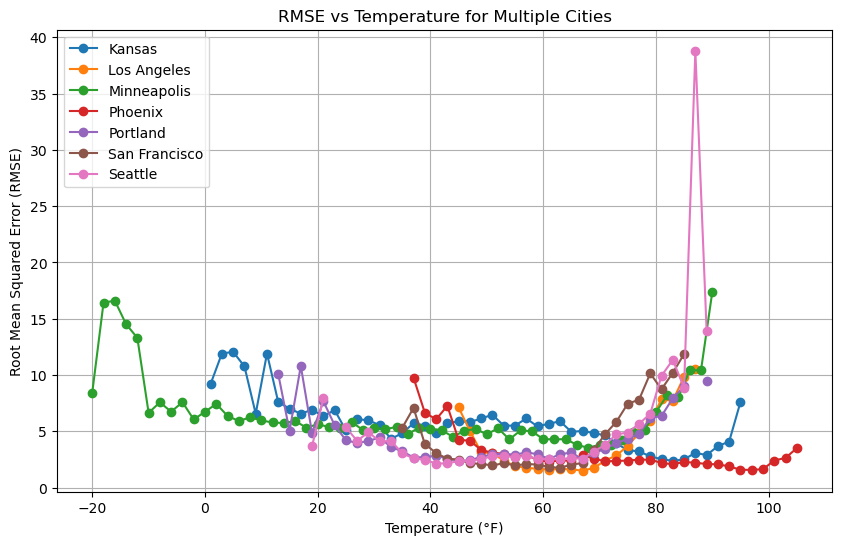

,City,RMSE
0,Kansas,6.427765
1,Los Angeles,2.739649
2,Minneapolis,6.444588
3,Phoenix,3.265739
4,Portland,3.750157
5,San Francisco,2.891329
6,Seattle,3.620078


In [29]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# List of file paths and city names
file_paths = [
    "kansas_1960-2024_with_tavg_recalculated.csv",
    "los_angeles_1960-2024_with_tavg_recalculated.csv",
    "minneapolis_1960-2024_with_tavg_recalculated.csv",
    "phoenix_1960-2024_with_tavg_recalculated.csv",
    "portland_1960-2024_with_tavg_recalculated.csv",
    "san_francisco_1960-2024_with_tavg_recalculated.csv",
    "seattle_1960-2024_with_tavg_recalculated.csv",
]

city_names = ["Kansas", "Los Angeles", "Minneapolis", "Phoenix", "Portland", "San Francisco", "Seattle"]

# RNN Model Definition
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Output of the last time step
        return out

# Model parameters
input_size = 3  # TAVG, TMAX, TMIN
hidden_size = 50
output_size = 1
num_layers = 2
num_epochs = 50
batch_size = 16
learning_rate = 0.001
sequence_length = 5

# Results storage
results = []
rmse_by_temp = {}

# Process each city
for file_path, city_name in zip(file_paths, city_names):
    # Load dataset
    df = pd.read_csv(file_path)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
    df = df[['TAVG', 'TMAX', 'TMIN']].dropna()
    
    # Scale data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df[['TAVG', 'TMAX', 'TMIN']])
    
    # Create sequences
    def create_sequences(data, sequence_length):
        X, y = [], []
        for i in range(len(data) - sequence_length):
            X.append(data[i:i + sequence_length])
            y.append(data[i + sequence_length, 0])  # TAVG as target
        return np.array(X), np.array(y)
    
    X, y = create_sequences(data_scaled, sequence_length)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)
    
    # Initialize and train model
    model = RNN(input_size, hidden_size, output_size, num_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Evaluate model
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).squeeze()

    # Inverse transform
    y_pred_inverse = scaler.inverse_transform(
        np.hstack((y_pred.numpy().reshape(-1, 1), np.zeros((y_pred.shape[0], 2))))
    )[:, 0]
    y_test_inverse = scaler.inverse_transform(
        np.hstack((y_test.numpy().reshape(-1, 1), np.zeros((y_test.shape[0], 2))))
    )[:, 0]
    
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
    results.append({'City': city_name, 'RMSE': rmse})
    
    # RMSE vs Temperature
    df_rmse = pd.DataFrame({'TAVG': y_test_inverse, 'RMSE': np.sqrt((y_test_inverse - y_pred_inverse) ** 2)})
    bins = np.arange(int(df_rmse['TAVG'].min()), int(df_rmse['TAVG'].max()) + 2, 2)
    df_rmse['Temp_Range'] = pd.cut(df_rmse['TAVG'], bins)
    avg_rmse_by_temp = df_rmse.groupby('Temp_Range')['RMSE'].mean().reset_index()
    avg_rmse_by_temp['Avg_Temp'] = avg_rmse_by_temp['Temp_Range'].apply(lambda x: (x.left + x.right) / 2)
    rmse_by_temp[city_name] = avg_rmse_by_temp

# Plot RMSE vs Temperature for all cities
plt.figure(figsize=(10, 6))
for city_name in city_names:
    plt.plot(rmse_by_temp[city_name]['Avg_Temp'], rmse_by_temp[city_name]['RMSE'], marker='o', linestyle='-', label=city_name)

plt.xlabel('Temperature (°F)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Temperature for Multiple Cities')
plt.grid()
plt.legend()
plt.show()

# Results table
results_df = pd.DataFrame(results)
results_df


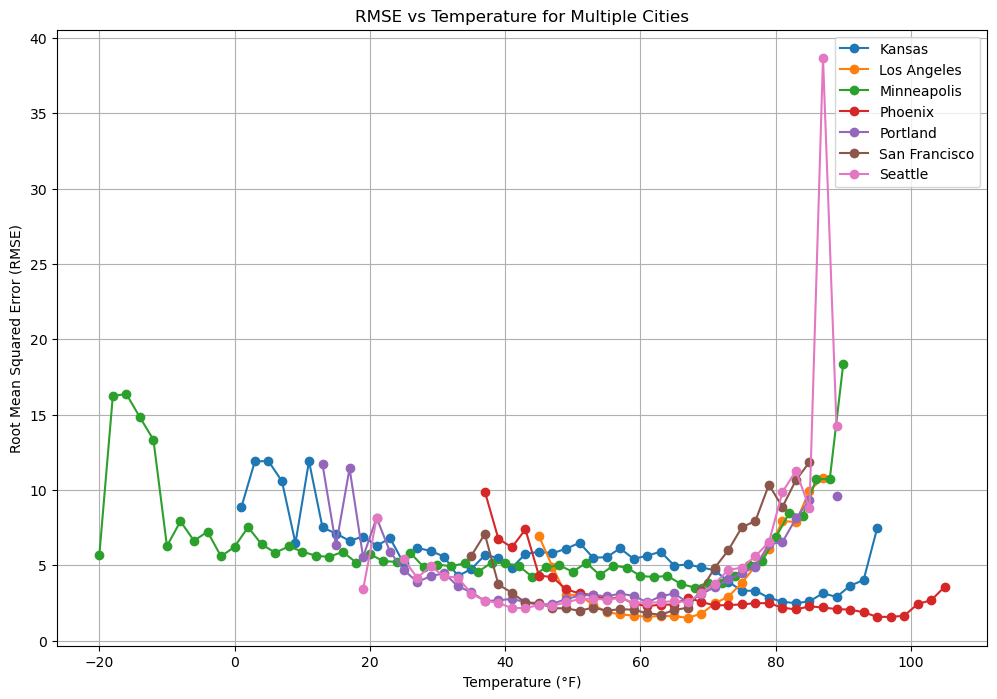

Final Results Table:
            City      RMSE  Average Temperature  Temp at Min RMSE  Min RMSE
0         Kansas  6.434862                 49.0              83.0  2.490438
1    Los Angeles  2.754206                 66.0              67.0  1.527055
2    Minneapolis  6.342576                 35.0              68.0  3.531899
3        Phoenix  3.267242                 71.0              95.0  1.582453
4       Portland  3.776393                 51.0              45.0  2.378585
5  San Francisco  2.895545                 60.0              63.0  1.729199
6        Seattle  3.614435                 54.0              41.0  2.158353


In [34]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# List of file paths and city names
file_paths = [
    "kansas_1960-2024_with_tavg_recalculated.csv",
    "los_angeles_1960-2024_with_tavg_recalculated.csv",
    "minneapolis_1960-2024_with_tavg_recalculated.csv",
    "phoenix_1960-2024_with_tavg_recalculated.csv",
    "portland_1960-2024_with_tavg_recalculated.csv",
    "san_francisco_1960-2024_with_tavg_recalculated.csv",
    "seattle_1960-2024_with_tavg_recalculated.csv",
]

city_names = ["Kansas", "Los Angeles", "Minneapolis", "Phoenix", "Portland", "San Francisco", "Seattle"]

# RNN Model Definition
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Output of the last time step
        return out

# Model parameters
input_size = 3  # TAVG, TMAX, TMIN
hidden_size = 50
output_size = 1
num_layers = 2
num_epochs = 50
batch_size = 16
learning_rate = 0.001
sequence_length = 5

# Results storage
results = []
rmse_by_temp = {}

# Process each city
for file_path, city_name in zip(file_paths, city_names):
    # Load dataset
    df = pd.read_csv(file_path)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
    df = df[['TAVG', 'TMAX', 'TMIN']].dropna()
    
    # Scale data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df[['TAVG', 'TMAX', 'TMIN']])
    
    # Create sequences
    def create_sequences(data, sequence_length):
        X, y = [], []
        for i in range(len(data) - sequence_length):
            X.append(data[i:i + sequence_length])
            y.append(data[i + sequence_length, 0])  # TAVG as target
        return np.array(X), np.array(y)
    
    X, y = create_sequences(data_scaled, sequence_length)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)
    
    # Initialize and train model
    model = RNN(input_size, hidden_size, output_size, num_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Evaluate model
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).squeeze()

    # Inverse transform
    y_pred_inverse = scaler.inverse_transform(
        np.hstack((y_pred.numpy().reshape(-1, 1), np.zeros((y_pred.shape[0], 2))))
    )[:, 0]
    y_test_inverse = scaler.inverse_transform(
        np.hstack((y_test.numpy().reshape(-1, 1), np.zeros((y_test.shape[0], 2))))
    )[:, 0]
    
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
    
    # RMSE vs Temperature
    df_rmse = pd.DataFrame({'TAVG': y_test_inverse, 'RMSE': np.sqrt((y_test_inverse - y_pred_inverse) ** 2)})
    bins = np.arange(int(df_rmse['TAVG'].min()), int(df_rmse['TAVG'].max()) + 2, 2)
    df_rmse['Temp_Range'] = pd.cut(df_rmse['TAVG'], bins)
    avg_rmse_by_temp = df_rmse.groupby('Temp_Range')['RMSE'].mean().reset_index()
    avg_rmse_by_temp['Avg_Temp'] = avg_rmse_by_temp['Temp_Range'].apply(lambda x: (x.left + x.right) / 2)
    rmse_by_temp[city_name] = avg_rmse_by_temp

    # Additional metrics
    # Additional metrics
    avg_temp = pd.to_numeric(avg_rmse_by_temp['Avg_Temp'], errors='coerce').mean()
    min_rmse_row = avg_rmse_by_temp.loc[avg_rmse_by_temp['RMSE'].idxmin()]
    temp_at_min_rmse = min_rmse_row['Avg_Temp']
    min_rmse_value = min_rmse_row['RMSE']

    
    results.append({
        'City': city_name,
        'RMSE': rmse,
        'Average Temperature': avg_temp,
        'Temp at Min RMSE': temp_at_min_rmse,
        'Min RMSE': min_rmse_value
    })

# Plot RMSE vs Temperature for all cities
plt.figure(figsize=(12, 8))
for city_name in city_names:
    plt.plot(rmse_by_temp[city_name]['Avg_Temp'], rmse_by_temp[city_name]['RMSE'], marker='o', linestyle='-', label=city_name)

plt.xlabel('Temperature (°F)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Temperature for Multiple Cities')
plt.grid()
plt.legend()
plt.show()

# Results table
results_df = pd.DataFrame(results)
print("Final Results Table:")
print(results_df)
